# Mná na hÉireann and the COVID-19 Gender Gap?
## Why women are more likely to contract COVID-19 in Ireland?
Ireland seems to be controlling its COVID-19 outbreak. The official statistics have been moving in the right direction and there is growing evidence that the growth rate in the confirmed cases, hospitalisations, and the need for ICU beds is falling steadily.

There has been plenty of discussion online and among the scientific community about the apparent gender gap that exists in COVID-19 deaths -  the illness is significantly more likely to prove fatal for men than for women -  with various explanations advanced based on biological and behavioral differences between men and women.
A different gender gap exists in the Irish data: currently more women have tested positive for COVID-19 than men, but the reverse was true a few weeks ago. 





In [1]:
from datetime import date

import pandas as pd
import numpy as np

from matplotlib.pylab import plt

import seaborn as sns

sns.set_style("white")

sns.set_context("poster")
dpi = 200
figsize=(15, 6)


%matplotlib inline

In [2]:
ireland_dataset = '../data/raw/ireland_stats_manual.csv'
ireland_age_dataset = '../data/raw/ages_ireland_2016.csv'


In [3]:
df = pd.read_csv(ireland_dataset, parse_dates=['date'], dayfirst=True).dropna(how='all')
df['day_of_month'] = df['date'].map(lambda d: d.day)

df.shape

(23, 37)

In [4]:
# Based on data at https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=E3002&PLanguage=0

ages_df = pd.read_csv(ireland_age_dataset).set_index('age')
ages_df['all'] = ages_df.sum(axis=1)

ages_df['frac_M'] = ages_df['M']/ages_df['all'].sum()

ages_df['frac_F'] = ages_df['F']/ages_df['all'].sum()

ages_df.head()



,M,F,all,frac_M,frac_F
age,,,,,
0,31876,30381,62257,0.006694,0.006380
1,32824,31205,64029,0.006893,0.006553
2,34031,32287,66318,0.007147,0.006780
3,34785,33291,68076,0.007305,0.006991
4,36215,34620,70835,0.007605,0.007270


In [5]:
df['gender_ratio'] = df['male']/df['female']

On March 18 there were 241 male cases and 189 female cases - 30% more male cases than female cases - even though the most recent census data indicates a near 50/50 split between males and females. As the days marched on, the number of female cases grew more quickly than the number of male cases, and by the end of March there were >20% more COVID-19 females than males. At the time of writing the ratio of male to female cases has fallen from 1.3, in mid-march, to 0.83 in early April (see below).

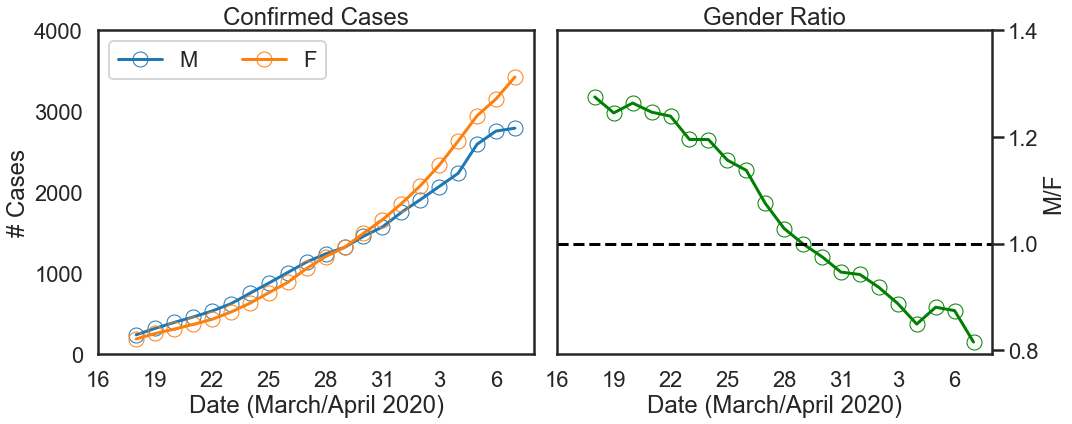

In [12]:
fig, (ax, bx) = plt.subplots(figsize=figsize, ncols=2)

df[['male', 'female']].plot(ax=ax, marker='o', markersize=15, markerfacecolor='none')

ax.legend(['M', 'F'], ncol=2)

# ax.set_ylim(0, 15)
# ax.set_yticks(np.arange(0, 16, 3))
ax.set_title('Confirmed Cases')
ax.set_xlabel('Date (March/April 2020)')
ax.set_ylabel('# Cases')
    
ax.set_xticks(range(0, len(df), 3))
ax.set_xticklabels([df.iloc[i]['day_of_month'] for i in range(len(df)) if i%3 is 0])
ax.set_yticks(np.arange(0, 4001, 1000))



df['gender_ratio'].plot(ax=bx, c='g', marker='o', markersize=15, markerfacecolor='none')
bx.axhline(1, c='k', ls='--')

bx.set_title('Gender Ratio')
bx.set_xlabel('Date (March/April 2020)')
bx.set_ylabel('M/F')
    
bx.set_xticks(range(0, len(df), 3))
bx.set_xticklabels([df.iloc[i]['day_of_month'] for i in range(len(df)) if i%3 is 0])

bx.yaxis.set_label_position("right")
bx.yaxis.tick_right()
bx.set_yticks(np.arange(0.8, 1.41, .2))


fig.tight_layout()

In [13]:
fig.savefig('../graphs/gender_analysis_for_ireland.png', format='png', dpi=dpi)

Why might this shift have occurred? Are females at greater risk of contracting COVID-19 than males? An alternative explanation is that we are not witnessing a COVID-19 gender gap but rather a different gender gap, one exists in the Irish healthcare system, and which is exposed as we put our precious healthcare workers in harms way. 
The first thing to note is that when we look at the percentage of healthcare workers who have contracted the virus over time, then we see a gradual increase, from the low 20's in March to the mid-to-high 20''s in April. More than a quarter of Irish COVID-19 cases are healthcare workers, even though they represent only about 2–3% of the population.

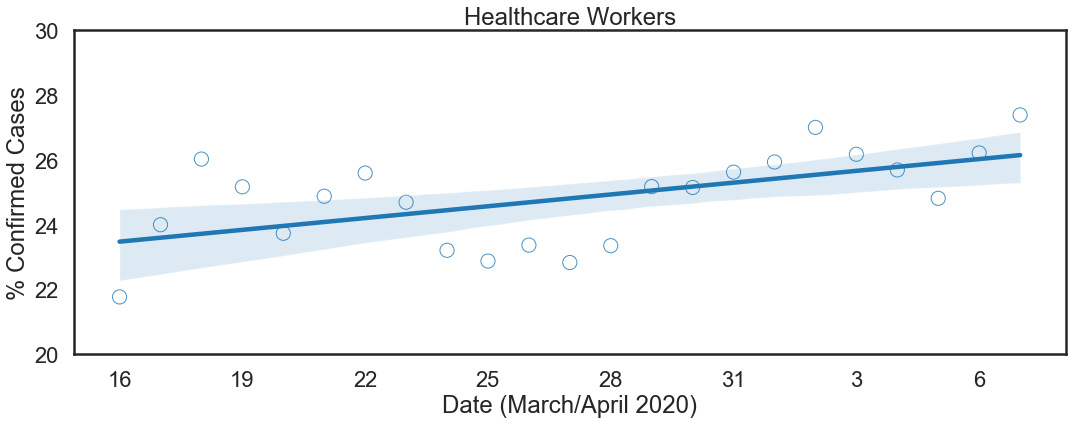

In [14]:
fig, ax = plt.subplots(figsize=figsize)

sns.regplot(df.index.values, 100*df['healthcare']/df['cases'], 
            ax=ax, truncate=True, 
            scatter_kws=dict(marker='o', s=200, facecolors='none')
)

ax.set_ylim(20, 30)
ax.set_title('Healthcare Workers')
ax.set_xlabel('Date (March/April 2020)')
ax.set_ylabel('% Confirmed Cases')
    
ax.set_xticks(range(0, len(df), 3))
ax.set_xticklabels([df.iloc[i]['day_of_month'] for i in range(len(df)) if i%3 is 0])

fig.tight_layout()

In [15]:
fig.savefig('../graphs/pct_healthcare_workers_ireland.png', format='png', dpi=dpi)

But could this, on its own, explain why more females have contracted COVID-19? At the time of writing there are 6,217 total confirmed cases, with known gender. Of these, 1,765 are healthcare workers, which leaves 4,452 as non-healthcare workers. Let's assume that there is actually no gender difference in infection rates. Then the 4,452 non-healthcare works should break down evenly between males and females, 2,226 apiece.
The healthcare system is not such a great model of gender quality: >90% of general nurses are female but only 41% of doctors are female, but there are more nurses than doctors. Let's assume that 70% of healthcare workers are female -  admittedly a very rough guess - then, all other things being equal, 1,236 of the 1,765 healthcare cases should be female and 529 should be male. This gives a estimated total of 3,462 female cases (2,226+1,236) versus 2,755 males (2,226+529).  In fact, the actual figures, at the time of writing, are 3,425 versus 2,792, which is an extremely close prediction at just 1% out.

Concluding: is there a COVID-19 gender gap in Ireland? Absolutely. At the time of writing 55% of confirmed cases are female; 45% are male. Does this mean that women are more likely to contract the virus than men? Not necessarily. Instead, it is possible, maybe even probable, that the COVID-19 gender gap is actually the Irish healthcare gender gap. More women get infected because more women are in frontline healthcare roles. 
Of course the real story here is the courage displayed by frontline healthcare staff - male and female - every day. Everyday they put themselves, and their families, at risk so that they can care for us, and our families. The risk they assume is all too real and all too evident. In data veritas. They are perhaps 10-times more likely to contract COVID-19 than the average Irish person, with women probably assuming a greater share of this risk than men, at least in Ireland. So what's new, Mná na hÉireann?